In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [17]:
def step_funtion(x):
    if x < thres:
        return 0
    else:
        return 1

In [18]:
def gen_training(data_point):
    x1 = np.random.random(data_point) # 0~1 사이의 랜덤
    x2 = np.random.random(data_point)
    # x1과 x2를 더한 값을 계산하고, 그 결과가 1보다 큰지 여부를 검사
    # 1보다 크다면 True, 그렇지 않으면 False 반환
    y = ((x1+x2)>1).astype(int)
    training_set = [((x1[i],x2[i]),y[i]) for i in range(len(x1))]
    return training_set

In [19]:
thres = 0.5
w = np.array([0.3,0.9])
lr = 0.1
data_point = 100
epoch = 10
training_set = gen_training(data_point)

In [20]:
training_set[:5]

[((0.38338750011707423, 0.10189164585801658), 0),
 ((0.9502630201743919, 0.351619784848471), 1),
 ((0.34894885799498976, 0.9309636761088017), 1),
 ((0.24917945392390528, 0.8473200123378039), 1),
 ((0.08969091500061455, 0.913589067135576), 1)]

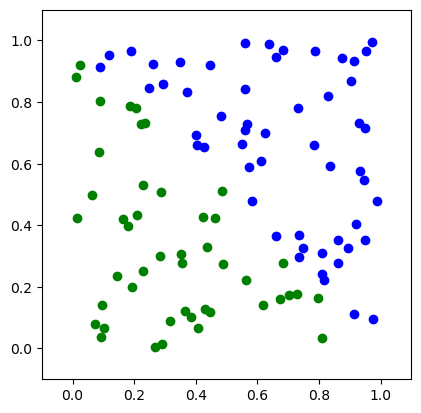

In [21]:
plt.figure(0)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
# x축과 y축이 동일한 비율을 가지도록 조정하여, 
# 도형이나 데이터 포인트가 왜곡되지 않고 정확한 모양을 유지
ax = plt.gca()
ax.set_aspect('equal',adjustable='box')
# 각 데이xj 포인트의 x 및 y 좌표는 x[0],x[1]의 값
for x,y in training_set:
    if y == 1:
        plt.plot(x[0],x[1],'bo')
    else:
        plt.plot(x[0],x[1],'go')
plt.show()

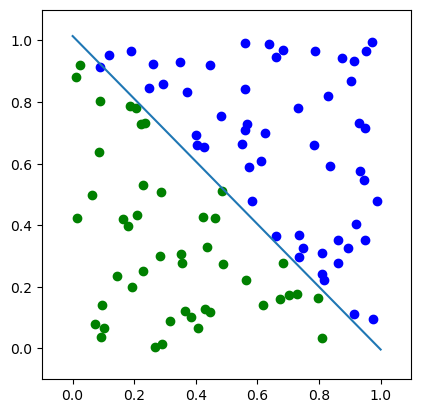

In [22]:
%matplotlib inline
import time
from IPython.display import clear_output

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)

xx = np.linspace(0, 1, 50)
for i in range(epoch):
    cnt = 0
    for x, y in training_set:
        clear_output(wait=True)  # 이전 출력 지우기
        u = sum(x * w) 
        error = y - step_funtion(u)
        for index, value in enumerate(x):
            w[index] = w[index] + lr * error * value

        # 새로운 figure 생성
        plt.figure()
        plt.ylim(-0.1, 1.1)
        plt.xlim(-0.1, 1.1)

        # 동일 비율 설정
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')

        # 데이터 포인트 플롯
        for xs, ys in training_set:
            if ys == 1:
                plt.plot(xs[0], xs[1], 'bo')
            else:
                plt.plot(xs[0], xs[1], 'go')

        # 결정 경계 선 플롯
        yy = -w[1] / w[0] * xx + thres / w[0]
        plt.plot(xx, yy)
        
        # 그래프 출력
        plt.show()
        
        # 잠시 대기
        time.sleep(0.01)

In [23]:
w[0]

0.49293568252590714

In [24]:
w[1]

0.5016846627544373

In [ ]:
# y = -x + 1